# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
 # Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}&units=metric"  # Specify units=metric for Celsius instead of default Kelvin


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | bamboo flat
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | suncho corral
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | anaconda
Processing Record 12 of Set 1 | nieuw amsterdam
Processing Record 13 of Set 1 | weno
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | aldan
Processing Record 18 of Set 1 | rodolfo sanchez taboada
Processing Record 19 of Set 1 | chicoana
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | blackpool
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | kitami
Processing Record 38 of Set 4 | miyako
Processing Record 39 of Set 4 | lintong
Processing Record 40 of Set 4 | las terrenas
Processing Record 41 of Set 4 | orden
Processing Record 42 of Set 4 | fisterra
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | lihue
Processing Record 45 of Set 4 | vernon
Processing Record 46 of Set 4 | mantta
City not found. Skipping...
Processing Record 47 of Set 4 | matozinhos
Processing Record 48 of Set 4 | tambopata
Processing Record 49 of Set 4 | medina
Processing Record 0 of Set 5 | geroskipou
City not found. Skipping...
Processing Record 1 of Set 5 | kawthoung
City not found. Skipping...
Processing Record 2 of Set 5 | kievka
Processing Record 3 of Set 5 | saint croix
Processing Record 4 of Set 5 | kirakira
Processing Record 5 of Set 5 | camana
Processing Record 6 of Set 5 | ahau
City not found. Skipping...
Processing Record 7 of Set 5 | sao vicente
Processing Record 8 of Set 5 | jiagedaqi
Pro

Processing Record 28 of Set 8 | pasighat
Processing Record 29 of Set 8 | sambava
Processing Record 30 of Set 8 | saint-philippe
Processing Record 31 of Set 8 | north bend
Processing Record 32 of Set 8 | toga village
City not found. Skipping...
Processing Record 33 of Set 8 | warman
Processing Record 34 of Set 8 | hailar
Processing Record 35 of Set 8 | hopelchen
Processing Record 36 of Set 8 | dakhla
Processing Record 37 of Set 8 | huruta
Processing Record 38 of Set 8 | bahia de kino
Processing Record 39 of Set 8 | luanda
Processing Record 40 of Set 8 | san sebastian de la gomera
Processing Record 41 of Set 8 | zavodskoy
Processing Record 42 of Set 8 | odacho-oda
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | palu
Processing Record 45 of Set 8 | cidreira
Processing Record 46 of Set 8 | nenjiang
Processing Record 47 of Set 8 | barrouallie
Processing Record 48 of Set 8 | letterkenny
Processing Record 49 of Set 8 | englewood
Processing Record 0 of Set 9 | kapoeta
Pr

-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



In [10]:
# Show Record Count
print(city_data_df.count())

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64


In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,10.98,70,20,2.57,GB,1697128886
1,grytviken,-54.2811,-36.5092,-1.49,93,97,2.00,GS,1697128948
2,bamboo flat,11.7000,92.7167,26.05,94,40,0.00,IN,1697129078
3,olonkinbyen,70.9221,-8.7187,1.02,74,97,8.56,SJ,1697129078
4,suncho corral,-27.9336,-63.4294,23.31,20,1,4.76,AR,1697129078


In [12]:
# Define the directory path
output_data_dir = "../output_data"

# Create the directory if it doesn't exist
os.makedirs(output_data_dir, exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_data_dir, "cities.csv"), index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,10.98,70,20,2.57,GB,1697128886
1,grytviken,-54.2811,-36.5092,-1.49,93,97,2.00,GS,1697128948
2,bamboo flat,11.7000,92.7167,26.05,94,40,0.00,IN,1697129078
3,olonkinbyen,70.9221,-8.7187,1.02,74,97,8.56,SJ,1697129078
4,suncho corral,-27.9336,-63.4294,23.31,20,1,4.76,AR,1697129078


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

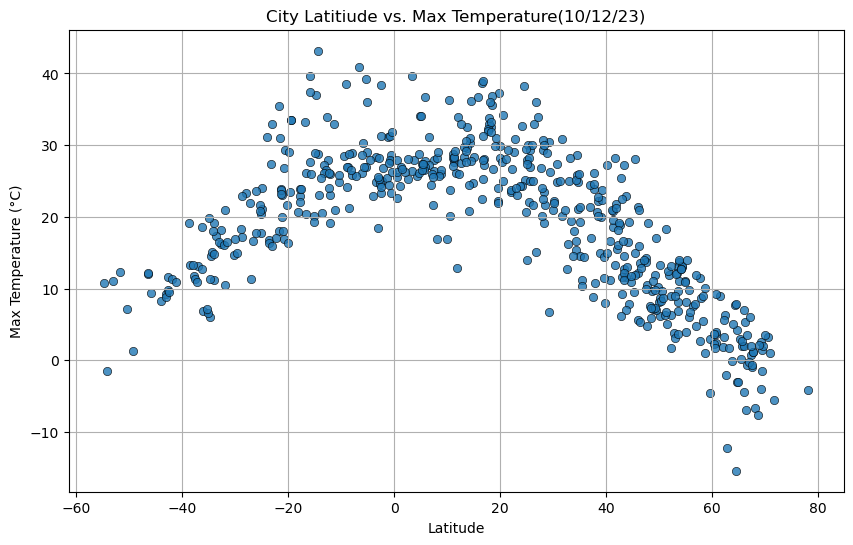

In [14]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitiude vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudevsTemperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

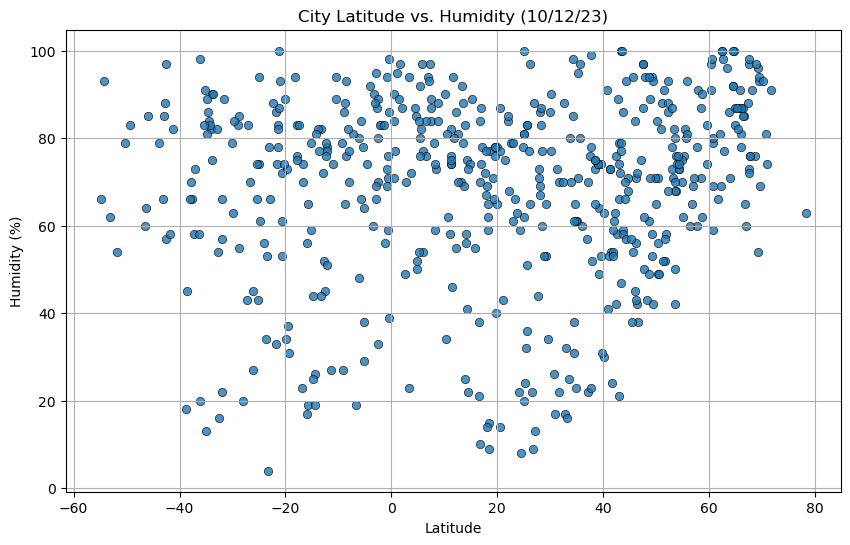

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ({})".format(time.strftime("%x")))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

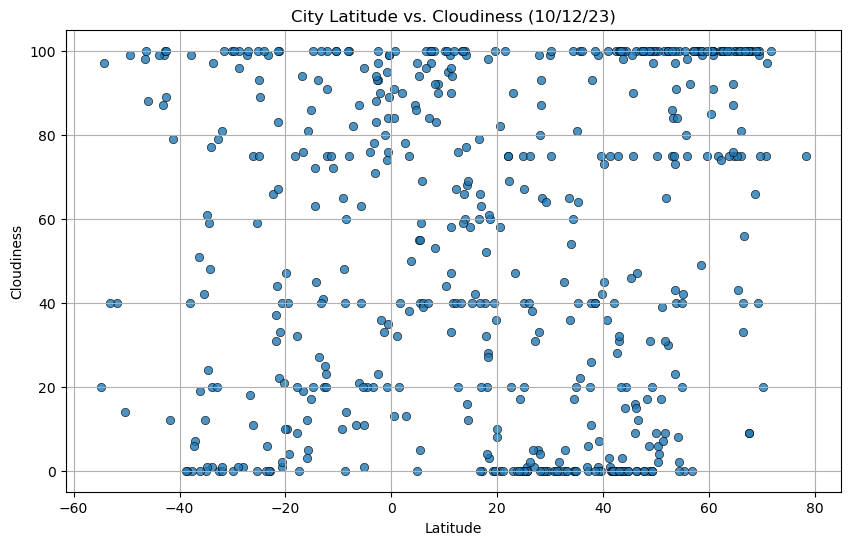

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ({})".format(time.strftime("%x")))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

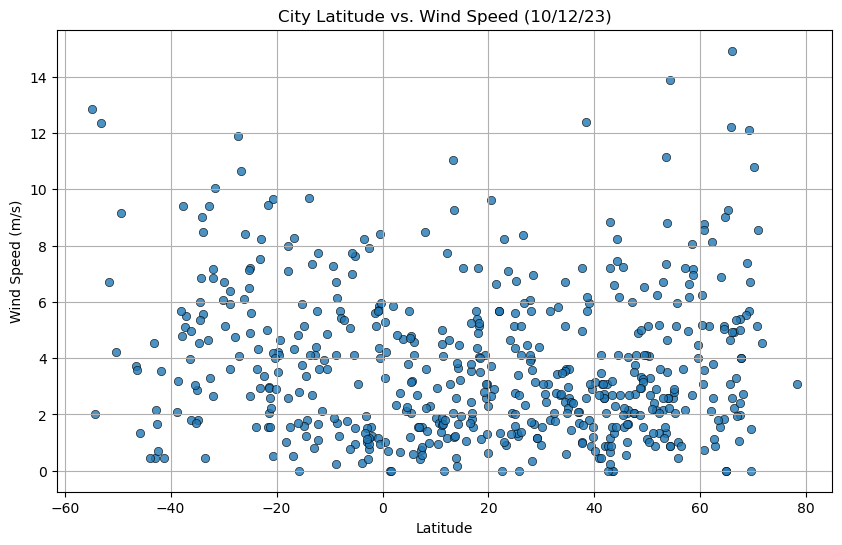

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed ({})".format(time.strftime("%x")))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudevsWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_reg(x_values, y_values, title, coor_1, coor_2, filename):
    #perform regression southern hemisphere
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values *slope + intercept
    line_eq = "y= "+str(round(slope,2)) + "x+ " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=0.5, alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    
    #plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.text(x_values.min(), max(y_values), line_eq, fontsize=12, color='red')
    
    print(f"The r-value is: {r_value}")
    
    #save
    plt.savefig("../output_data/Fig5.png")
    
    #show plot
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,10.98,70,20,2.57,GB,1697128886
2,bamboo flat,11.7000,92.7167,26.05,94,40,0.00,IN,1697129078
3,olonkinbyen,70.9221,-8.7187,1.02,74,97,8.56,SJ,1697129078
6,georgetown,5.4112,100.3354,27.23,92,40,2.06,MY,1697128921
10,anaconda,46.1285,-112.9423,5.55,71,100,2.06,US,1697129080


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-1.49,93,97,2.00,GS,1697128948
4,suncho corral,-27.9336,-63.4294,23.31,20,1,4.76,AR,1697129078
5,port-aux-francais,-49.3500,70.2167,1.30,83,99,9.15,TF,1697128951
7,margaret river,-33.9500,115.0667,11.14,90,1,5.55,AU,1697129079
8,west island,-12.1568,96.8225,25.99,78,100,7.72,CC,1697128948


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: = -0.8615591137036162


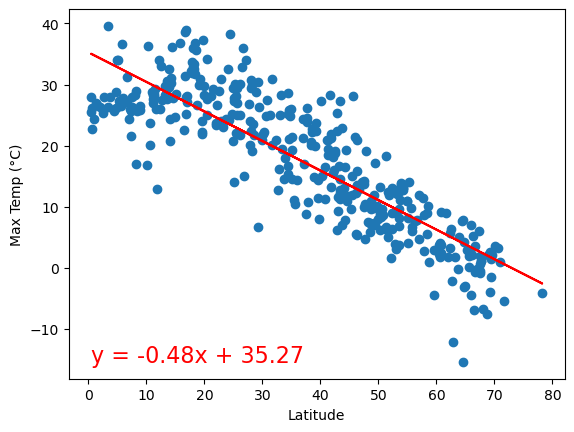

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")


#print line equation
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=16, color="red")

#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

The r-value is: = 0.7730658605634124


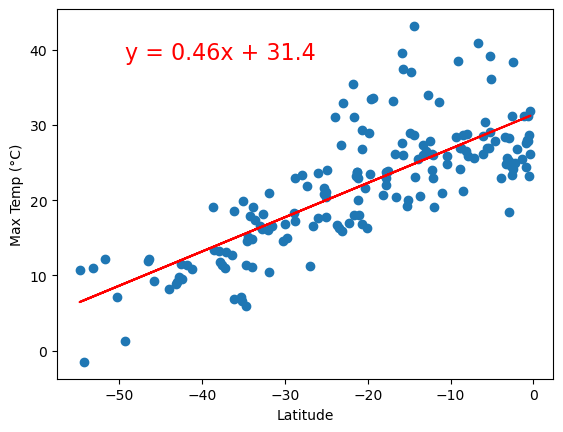

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")


# Calculate the coordinates for the upper right corner
x_range = x_values.max() - x_values.min()
y_range = y_values.max() - y_values.min()
x_position = x_values.min() + 0.1 * x_range  
y_position = y_values.min() + 0.9 * y_range 

# Change the annotation position to the upper portion
plt.annotate(line_eq, (x_position, y_position), fontsize=16, color="red")


#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

**Discussion about the linear relationship:** There is a highly negative correlation in the nothern hemisphere and a highly positive correlation in the southern hemisphere. The plots show that the higher the latitude number is, the lower the temp number is. Meaning, the further a point is located from the equator(0), the colder the point will be. The opposite is true, the highest temps are at the points closest to 0 in latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: = 0.1567324112593291


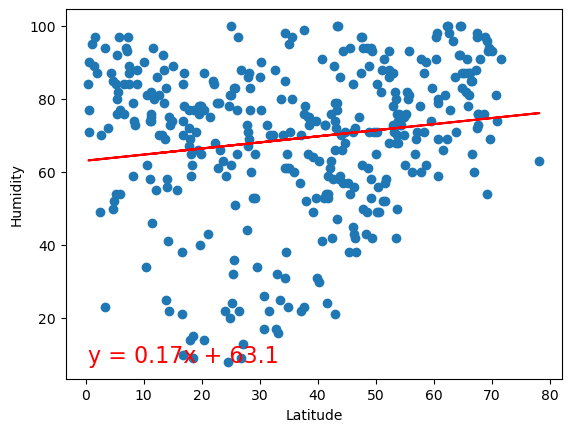

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")


#print line equation
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=16, color="red")

#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

The r-value is: = 0.016942211429988252


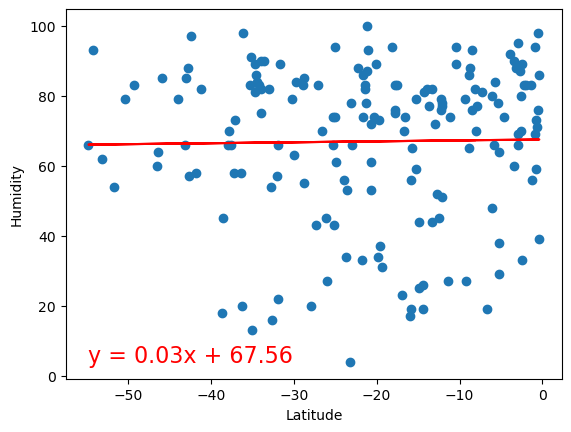

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")


#print line equation
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=16, color="red")

#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

**Discussion about the linear relationship:** In the northern hemisphere, the humidity seems to be lower in the latitude range 10-40. There is a greater distribution of data points in the higher levels of humidity in the latitude range of: 0-10 and 40-70, but overall there is a slight positive correlation. In the southern hemisphere, there is a greater distribution of data points in the 60-100 range for humidity along the -40 to 0 latitude, but overall almost no correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: = 0.16495185921619607


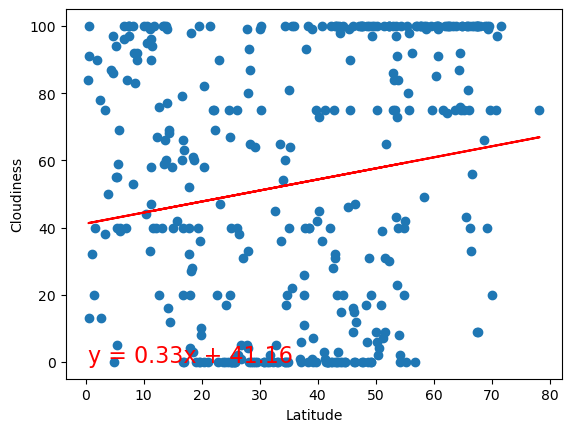

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


#print line equation
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=16, color="red")

#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

The r-value is: = 0.08926526234532756


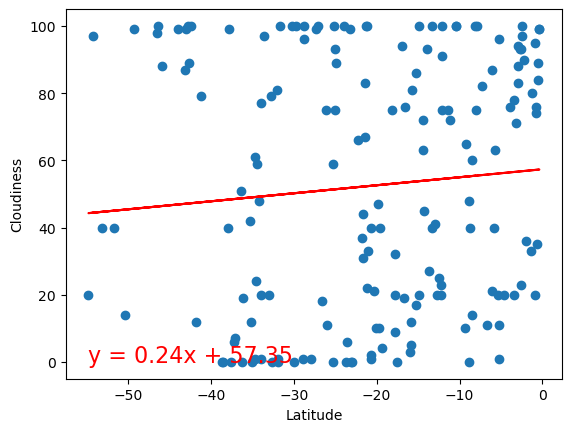

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


#print line equation
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=16, color="red")

#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

**Discussion about the linear relationship:** There appears to be a low positive correlation between the data points. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: = 0.18886321081001795


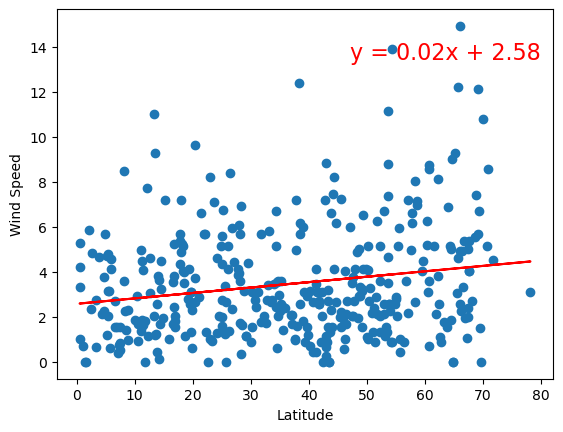

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Calculate the coordinates for the upper right corner
x_range = x_values.max() - x_values.min()
y_range = y_values.max() - y_values.min()
x_position = x_values.min() + 0.6 * x_range  
y_position = y_values.min() + 0.9 * y_range  

# Change the annotation position to the upper portion
plt.annotate(line_eq, (x_position, y_position), fontsize=16, color="red")


#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

The r-value is: = -0.1882727466318002


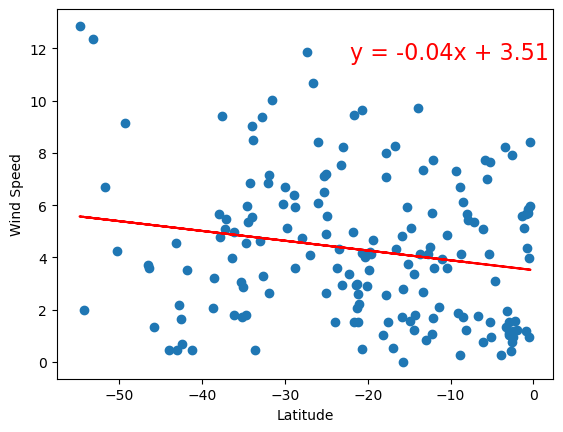

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


# Perform linear regression on data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#calculate the regression line
regress_values = x_values * slope + intercept
#create a line eq. string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Create the scatter plot
plt.scatter(x_values, y_values)

#plot the regression line
plt.plot(x_values, regress_values, "r-")

#display labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Calculate the coordinates for the upper right corner
x_range = x_values.max() - x_values.min()
y_range = y_values.max() - y_values.min()
x_position = x_values.min() + 0.6 * x_range  
y_position = y_values.min() + 0.9 * y_range  

# Change the annotation position to the upper portion
plt.annotate(line_eq, (x_position, y_position), fontsize=16, color="red")


#print r-value sentence
print(f"The r-value is: = {r_value}")

# Show the plot
plt.show()
    

**Discussion about the linear relationship:** The northern hemisphere has a slight positive correlation while the southern hemisphere has a slight negative correlation. 